In [17]:
from IPython.display import display

import pandas as pd
import matplotlib.pyplot as plt

from keras.layers import Dense
from keras.models import Sequential

from keras.metrics import MeanAbsolutePercentageError, MeanAbsoluteError
from keras.losses import MeanSquaredError

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [18]:
data = pd.read_parquet('../data/cars_v1.parquet')

data.head(2)

,year,cylinders,price,manufacturer_acura,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,...,paint_color_brown,paint_color_custom,paint_color_green,paint_color_grey,paint_color_orange,paint_color_purple,paint_color_red,paint_color_silver,paint_color_white,paint_color_yellow
0,2009,8,9000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2002,8,6000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [19]:
y = data['price']
x = data.drop(columns=['price'])

scale = StandardScaler()
x = scale.fit_transform(x)
y = scale.fit_transform(y.values.reshape(-1,1))

display(y)
display(x)

array([[-0.29791225],
       [-0.58786402],
       [-0.49121343],
       ...,
       [ 0.08820685],
       [-0.49169668],
       [-0.66518449]])

array([[ 1.26261644e-03,  1.45792508e+00, -9.34379705e-02, ...,
        -3.67057813e-01,  1.24243735e+00, -8.34055240e-02],
       [-7.66247201e-01,  1.45792508e+00, -9.34379705e-02, ...,
        -3.67057813e-01,  1.24243735e+00, -8.34055240e-02],
       [-2.18025903e-01, -1.47524904e+00, -9.34379705e-02, ...,
        -3.67057813e-01, -8.04869559e-01, -8.34055240e-02],
       ...,
       [-3.27670162e-01,  1.45792508e+00, -9.34379705e-02, ...,
        -3.67057813e-01,  1.24243735e+00, -8.34055240e-02],
       [-3.27670162e-01,  1.45792508e+00, -9.34379705e-02, ...,
        -3.67057813e-01, -8.04869559e-01, -8.34055240e-02],
       [-2.18025903e-01, -8.66198363e-03, -9.34379705e-02, ...,
        -3.67057813e-01, -8.04869559e-01, -8.34055240e-02]])

In [20]:
x_train, x_test, y_train, y_test = train_test_split(data, y, test_size=0.2)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.15)

print(f'Original')
print(f'   X: {data.shape}')
print(f'   y: {y.shape}\n')

print(f'Train')
print(f'   X: {x_train.shape}')
print(f'   y: {y_train.shape}\n')

print(f'Validation')
print(f'   X: {x_val.shape}')
print(f'   y: {y_val.shape}\n')

print(f'Test')
print(f'   X: {x_test.shape}')
print(f'   y: {y_test.shape}\n')

Original
   X: (434542, 93)
   y: (434542, 1)

Train
   X: (295488, 93)
   y: (295488, 1)

Validation
   X: (52145, 93)
   y: (52145, 1)

Test
   X: (86909, 93)
   y: (86909, 1)



In [21]:
layers = [
    Dense(128, input_dim=x_train.shape[1], activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='linear'),
]

model = Sequential(layers=layers)
model.compile(optimizer='adam', loss=MeanSquaredError(), metrics=[MeanAbsolutePercentageError(), MeanAbsoluteError()])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 128)               12032     
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 65        
Total params: 20,353
Trainable params: 20,353
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_val, y_val))

Train on 295488 samples, validate on 52145 samples
Epoch 1/10
295488/295488 [==============================] - 24s 81us/step - loss: 295.1881 - mean_absolute_percentage_error: 2161.6667 - mean_absolute_error: 4.8963 - val_loss: 0.1506 - val_mean_absolute_percentage_error: 122.6184 - val_mean_absolute_error: 0.3091
Epoch 2/10
295488/295488 [==============================] - 24s 82us/step - loss: 28.8907 - mean_absolute_percentage_error: 636.4430 - mean_absolute_error: 1.4165 - val_loss: 0.0108 - val_mean_absolute_percentage_error: 53.2106 - val_mean_absolute_error: 0.0830
Epoch 3/10
295488/295488 [==============================] - 25s 84us/step - loss: 8.4959 - mean_absolute_percentage_error: 254.5895 - mean_absolute_error: 0.5496 - val_loss: 0.0713 - val_mean_absolute_percentage_error: 39.1080 - val_mean_absolute_error: 0.1978
Epoch 4/10
295488/295488 [==============================] - 26s 88us/step - loss: 1.5813 - mean_absolute_percentage_error: 77.5813 - mean_absolute_error: 0.1770 

In [23]:
result = model.evaluate(x_test,y_test)

for i,metric in enumerate(model.metrics_names):
    print('{} : {:.4}'.format(metric, result[i]))

86909/86909 [==============================] - 3s 39us/step
loss : 9.24e-05
mean_absolute_percentage_error : 2.22
mean_absolute_error : 0.007382


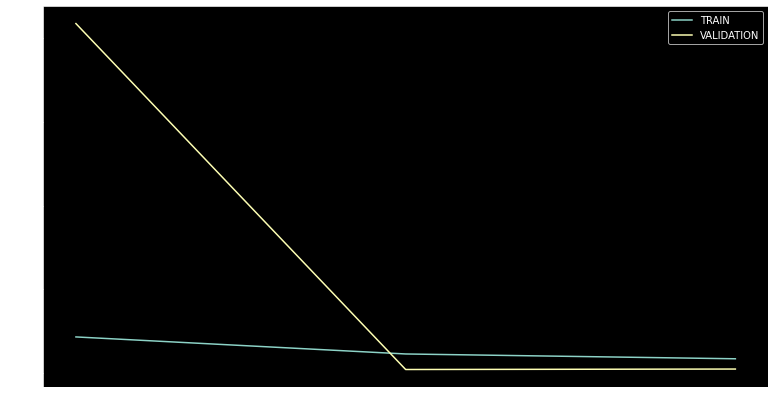

In [24]:
plt.figure(figsize=(13, 7))

plt.plot(model.history.history['loss'][7:], label='TRAIN')
plt.plot(model.history.history['val_loss'][7:], label='VALIDATION')

plt.title
plt.legend()
plt.show()

In [25]:
predict_n = 15

y_real = scale.inverse_transform(y[:predict_n])
y_hat = scale.inverse_transform(model.predict(data[:predict_n]))

print(' REAL \t\t PREDICT')
for i in range(predict_n):
	print('{:,.2f}\t{:,.2f}      '.format(y_real[i][0], y_hat[i][0]))


REAL 		 PREDICT
9,000.00	8,989.15      
6,000.00	6,047.01      
7,000.00	7,020.37      
37,000.00	36,802.30      
3,700.00	3,707.53      
19,950.00	19,832.15      
5,000.00	5,024.67      
39,950.00	39,689.18      
33,950.00	33,736.18      
3,795.00	3,841.95      
25,950.00	25,792.11      
49,950.00	49,663.95      
24,950.00	24,820.26      
5,000.00	5,411.83      
15,000.00	14,947.34      


In [26]:
model.save('precios.h5')